In [1]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd() , "..")))
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from src import config
warnings.filterwarnings("ignore")

In [2]:
import sys
import os

# 1. Xóa module cũ khỏi bộ nhớ nếu lỡ import nhầm
if "src.config" in sys.modules:
    del sys.modules["src.config"]

# 2. Lấy đường dẫn tuyệt đối đến thư mục src của Country Project
project_root = os.path.abspath("..")  # hoặc '.' nếu bạn đang chạy ngay từ thư mục gốc
src_path = os.path.join(project_root, "src")

# 3. Đảm bảo src_path của Country nằm đầu tiên trong sys.path
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# 4. Import đúng file
import config

# 5. Kiểm tra lại đường dẫn file đang được dùng
import inspect
print(inspect.getfile(config))  # Phải là src/config.py trong Country

42
c:\Country_Clustering_Project_CNS\src\config.py


In [3]:
base_dir = os.path.join(os.path.dirname(os.getcwd() ), "..")
csv_path = os.path.abspath(os.path.join("..", config.SET_PATH_DATA))
df = pd.read_csv(csv_path)
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA

In [7]:
df_ve = df.copy(deep = True)
df_ve.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [8]:
df_ve.drop("country" , axis = 1 , inplace = True)
print(df_ve.columns , f"Tổng số lượng cột là {len(df_ve.columns)}")

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') Tổng số lượng cột là 9


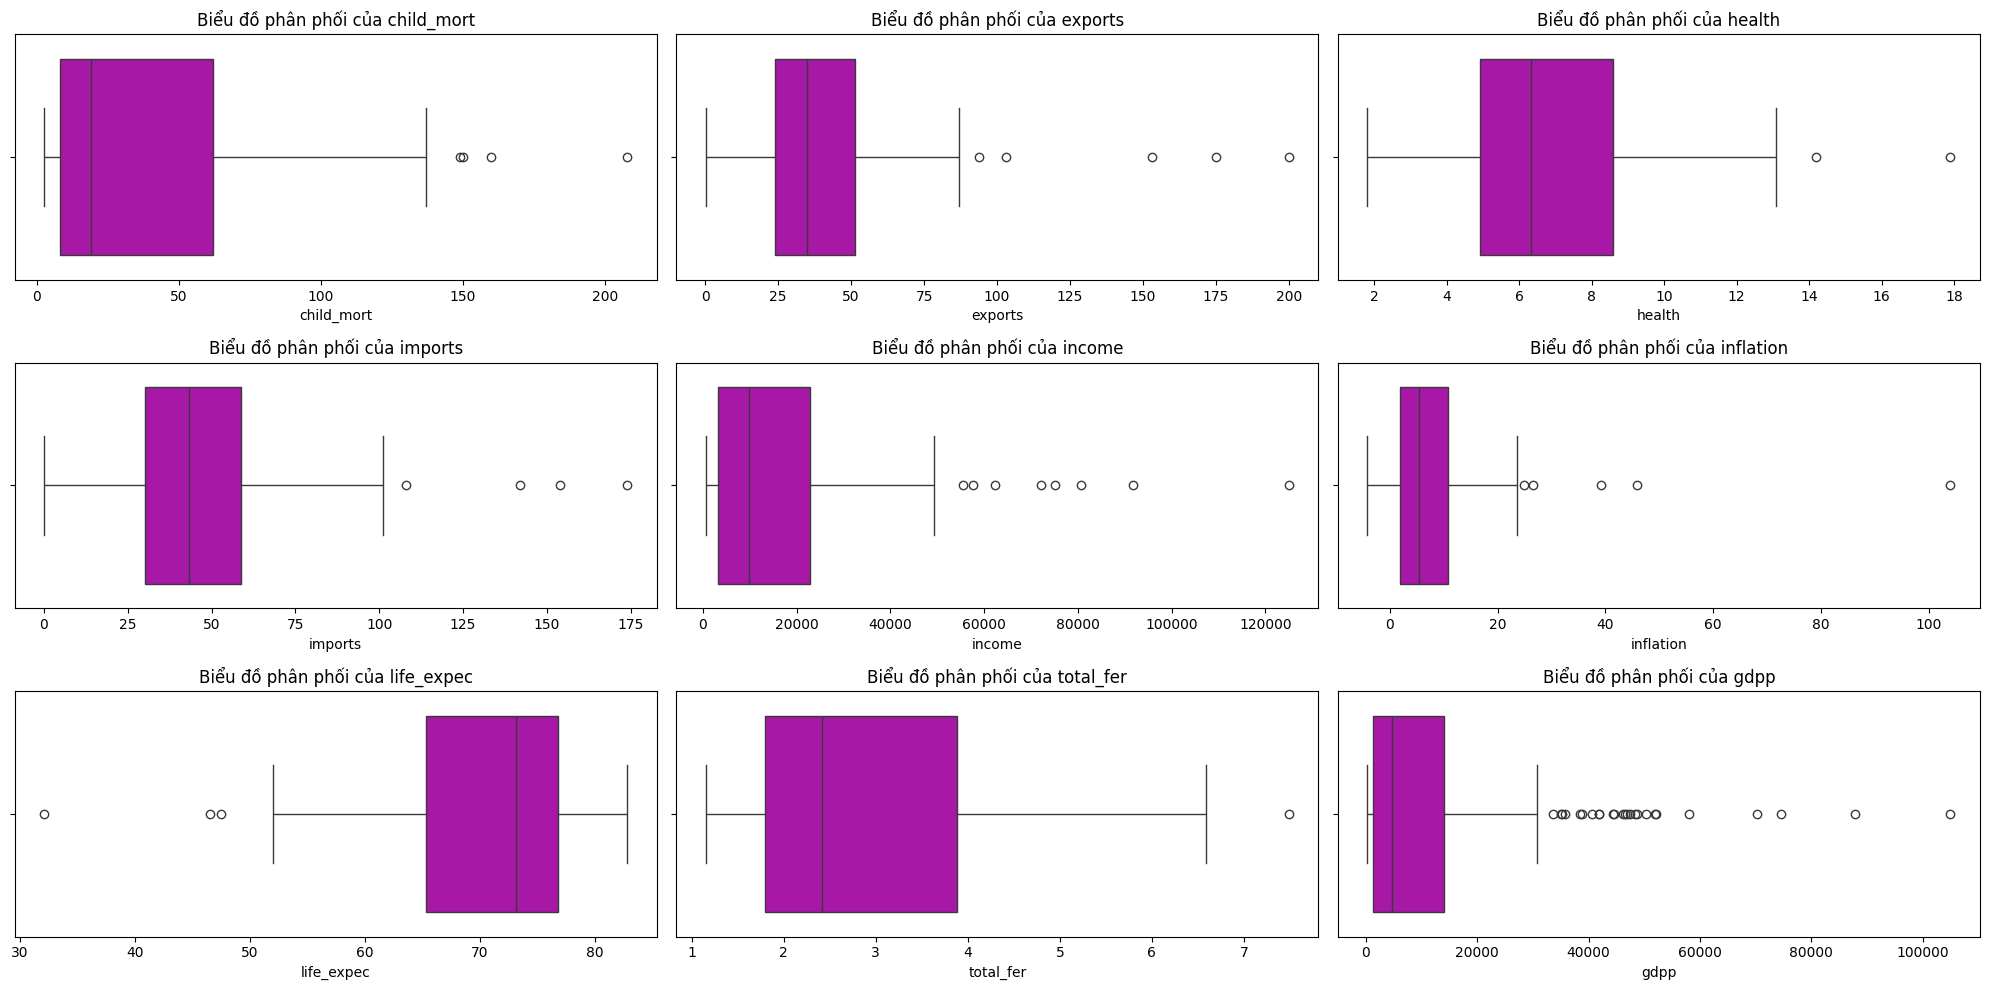

In [9]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve):
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.boxplot(X , ax = axes , color = 'm' , orient='h')
        title = X.name 
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()

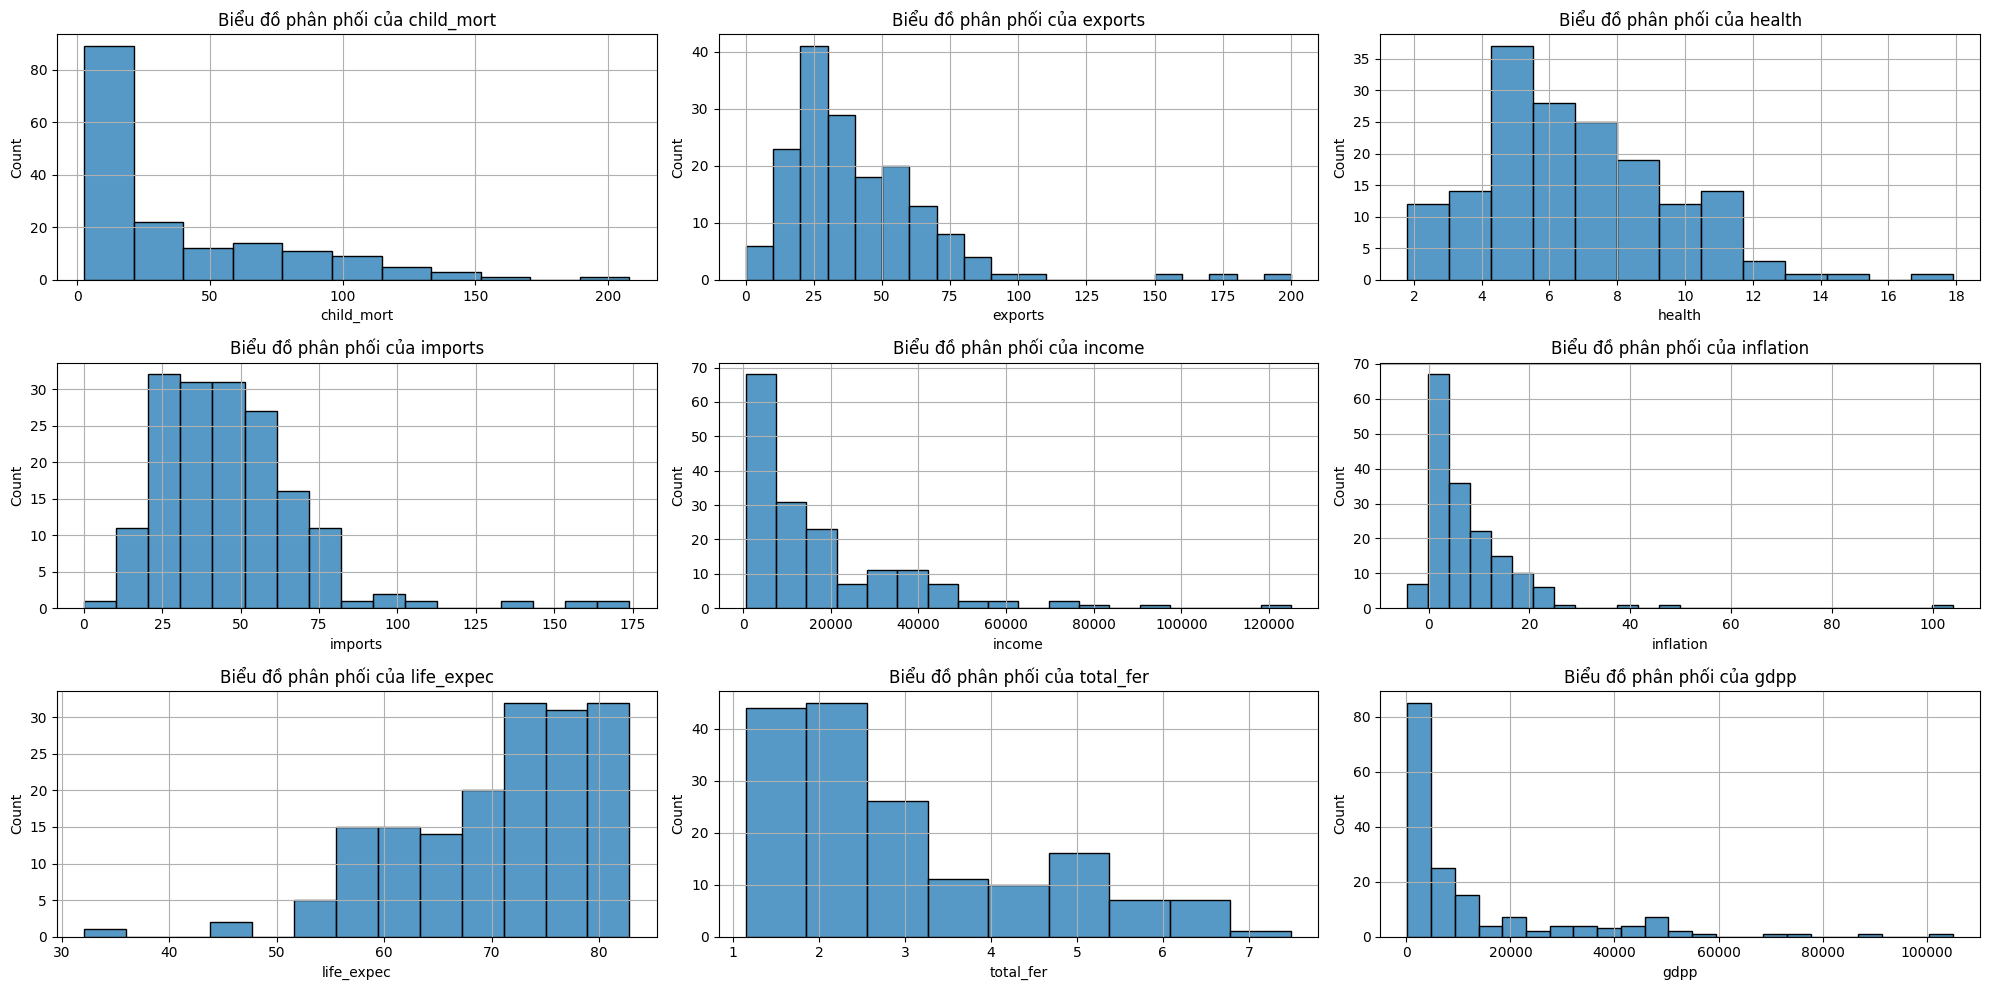

In [10]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve): 
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.histplot(X , ax = axes)
        axes.grid()
        title = X.name
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()
        

## Phân bố dữ liệu

- **Health**: Phân phối gần với chuẩn, với đỉnh ở khoảng 4–5.
- **Life expectancy**: Phân phối lệch trái – phần lớn quốc gia có tuổi thọ cao, một số ít thấp.
- Các chỉ số còn lại (**child mortality**, **exports**, **imports**, **income**, **inflation**, **total fertility**, **GDP**) đều **lệch phải**, với đỉnh ở mức thấp và đuôi kéo dài về phía các giá trị cao.

## Tình trạng kinh tế và xã hội

- **Thu nhập bình quân đầu người** rất thấp (đa số dưới 2000 USD).
- **GDP bình quân đầu người** cũng thấp – phản ánh sự giàu có thấp.
- **Của cải và thu nhập** phân bổ không đồng đều, thể hiện rõ qua các giá trị ngoại lệ cao.
- **Mức sống** không đồng đều giữa các quốc gia – thể hiện qua sự chênh lệch lớn trong thu nhập và tuổi thọ trung bình.

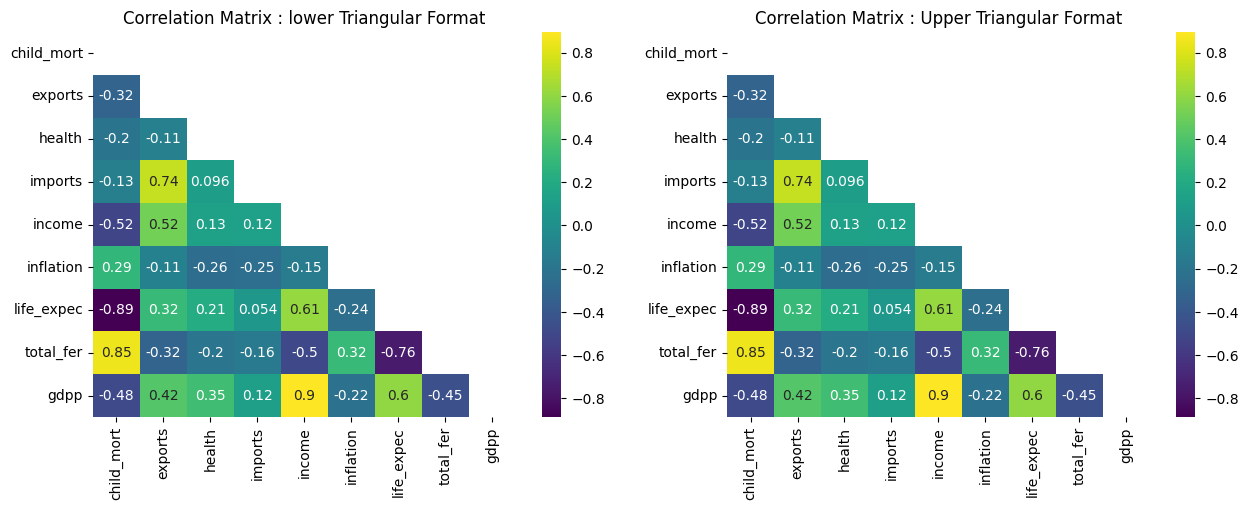

In [11]:
upper_triangle = np.triu(df_ve.corr())
lower_triangle = np.triu(df_ve.corr())

fig , ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df_ve.corr() , mask = lower_triangle , annot=True , cmap = "viridis" , cbar= True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.subplot(1,2,2 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask =upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')
plt.show()

## 🧠 Phân tích mối quan hệ giữa các đặc trưng và tình trạng quốc gia

### 📉 Ảnh hưởng của điều kiện kinh tế đến sức khỏe và dân số

- **Tỷ lệ trẻ tử vong cao** thường xảy ra khi:
  - `income`, `life_expec`, `gdpp`, `exports` **giảm**.
  - `inflation` **tăng**.
- Điều này cho thấy **điều kiện kinh tế ảnh hưởng nghiêm trọng** đến sức khỏe và tuổi thọ của người dân.
- `inflation` tăng → **tỷ lệ tử vong và tỷ lệ sinh đều tăng** ⇒ phản ánh các **quốc gia kém phát triển**.

### 🌍 Vai trò của xuất nhập khẩu

- Khi `exports` **tăng**:
  - `gdpp`, `imports`, `life_expec` **tăng**.
  - `child_mort` và `total_fer` **giảm**.
- Cho thấy **xuất nhập khẩu đóng vai trò quan trọng** trong việc thúc đẩy tăng trưởng kinh tế và cải thiện chất lượng cuộc sống.

---

### 🏁 Kết luận: 3 nhóm đặc trưng chính đánh giá tình trạng quốc gia

| Nhóm đặc trưng | Thuộc tính liên quan                                      | Ý nghĩa tổng quan                         |
|----------------|-----------------------------------------------------------|-------------------------------------------|
| **Health**     | `child_mort`, `life_expec`, `health` , `total_fer`                    | Phản ánh sức khỏe và tuổi thọ dân cư     |
| **Trade**      | `exports`, `imports`                                      | Đo lường mức độ mở cửa và hội nhập quốc tế |
| **Finance**    | `income`, `gdpp`, `inflation`                             | Đánh giá năng lực tài chính và ổn định vĩ mô |

=> Dựa trên ba nhóm này, có thể **suy ra mức độ phát triển và tình trạng sống của một quốc gia** một cách tương đối chính xác.


In [12]:
df1 = pd.DataFrame()
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()

,Trade,Health,Finance
0,1.200812,6.239852,1.349645
1,1.717580,3.035901,1.471658
2,1.603752,3.389763,3.165367
3,2.430387,6.469020,3.494919
4,2.362940,2.964898,2.240150


In [13]:
df1.describe()

,Trade,Health,Finance
count,167.000000,167.000000,167.000000
mean,2.000000,4.000000,3.000000
std,1.104055,1.380778,2.579372
min,0.004057,2.216400,0.259853
25%,1.289485,3.079392,1.331001
50%,1.783360,3.485516,2.102993
75%,2.443429,4.593860,3.780678
max,8.575913,8.646305,13.913036


## Chuẩn hóa dữ liệu

In [14]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler 
mms = MinMaxScaler()
sds = StandardScaler()

df1["Health"] = mms.fit_transform(df1[["Health"]])
df1["Finance"] = mms.fit_transform(df1[["Finance"]])
df1["Trade"] = mms.fit_transform(df1[["Trade"]])

df1 = df[["country"]].merge(df1, left_index=True, right_index=True)


In [15]:
df1.head(2)

,country,Trade,Health,Finance
0,Afghanistan,0.139614,0.625740,0.079820
1,Albania,0.199901,0.127451,0.088756


## APPLY PCA

In [16]:
df2 = df.copy(deep = True)
df2['health'] = sds.fit_transform(df2[['health']])
df2 = df2.drop('country',axis = 1)
for i in df2.columns : 
    if i != 'health' : 
        df2[i] = mms.fit_transform(df2[[i]])
    else : 
        print(i)

health


In [17]:
from sklearn.decomposition import PCA 
pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

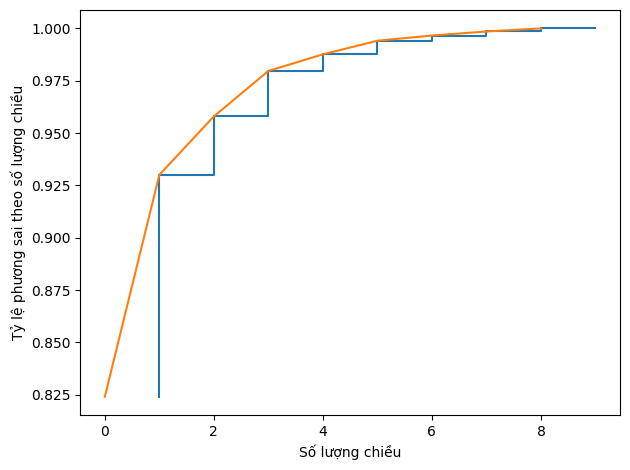

In [18]:
plt.step(list(range(1,10)) , np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Số lượng chiều')
plt.ylabel("Tỷ lệ phương sai theo số lượng chiều")
plt.tight_layout()
plt.show()

- k = 2 có thể giải thích được hơn 92% phương sai =>> chọn

In [19]:
pca_df2 = pca_df2[[0,1,2]]
pca_df2.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


In [20]:
x1 = df1.drop(columns=["country"]).values
x2 = pca_df2.values

## Apply Kmeans

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

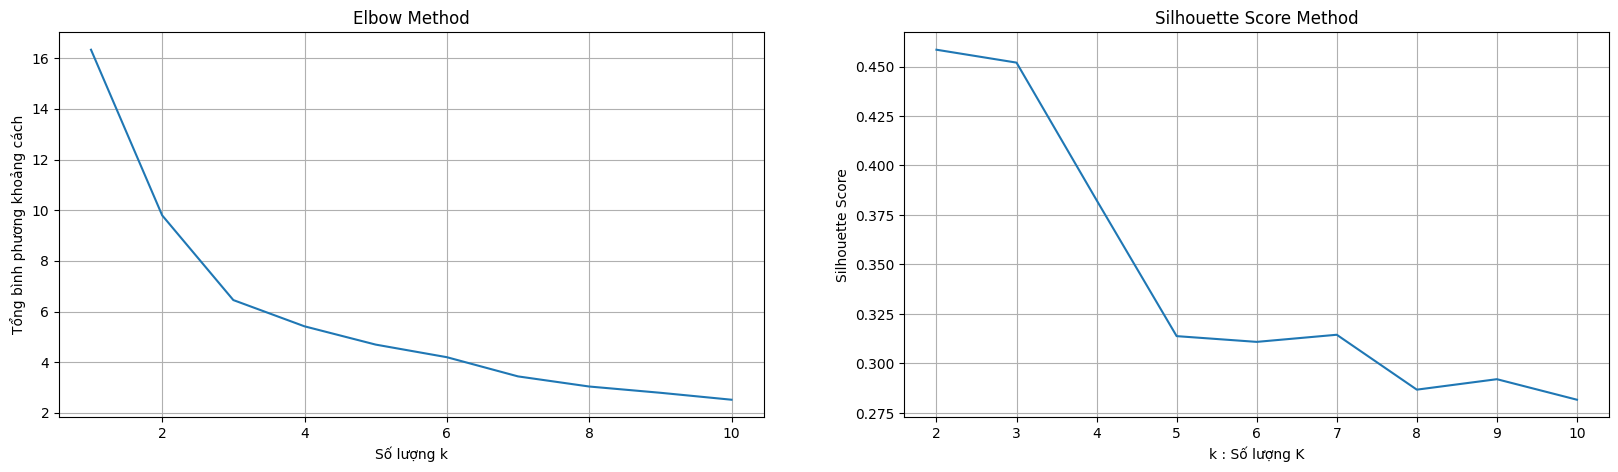

In [41]:
kmax = 10 
sse = [0] * kmax 
sil = []
fig , ax =plt.subplots(1,2 , figsize = (20,5))
fig = plt.subplot(1,2,1)
for k in range(1 , kmax+1):
    kmeans = KMeans(n_clusters=k , init= 'k-means++' , random_state= config.RANDOM_STATE)
    kmeans.fit(x1)
    sse[k-1] = kmeans.inertia_
sns.lineplot(x = range(1 , kmax +1) , y = sse[:])
plt.title("Elbow Method")
plt.xlabel("Số lượng k")
plt.ylabel("Tổng bình phương khoảng cách")
plt.grid()
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k , init = "k-means++" , random_state= config.RANDOM_STATE)
    kmeans.fit(x1)
    labels = kmeans.labels_
    sil.append(silhouette_score(x1, labels, metric="euclidean"))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("k : Số lượng K")
plt.ylabel("Silhouette Score")
plt.grid()

- Bằng phương pháp khủy tay và độ phân biệt thì k = 3 có thể phân biệt rõ các cụm nên chọn k = 3

[[0.22733454 0.18388867 0.14627612]
 [0.3097348  0.16784831 0.53038124]
 [0.18653481 0.63055841 0.08930844]]


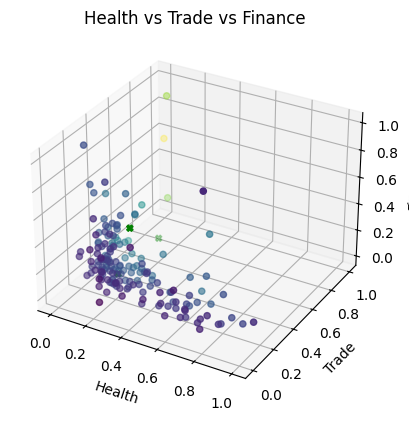

In [58]:
model = KMeans(n_clusters= 3 , init = "k-means++" , random_state= 42)
model.fit(x1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
print(centroids)
df['Class'] = labels 
df1['Class'] = labels 

fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="g")
ax.scatter3D(x , y , z , c = y)
plt.title("Health vs Trade vs Finance")
ax.set_xlabel("Health")
ax.set_ylabel("Trade")
ax.set_zlabel("Finance")
plt.show()

- Không xác định được
- Vẽ tỷ lệ tử vong và thu nhập để phân cụm

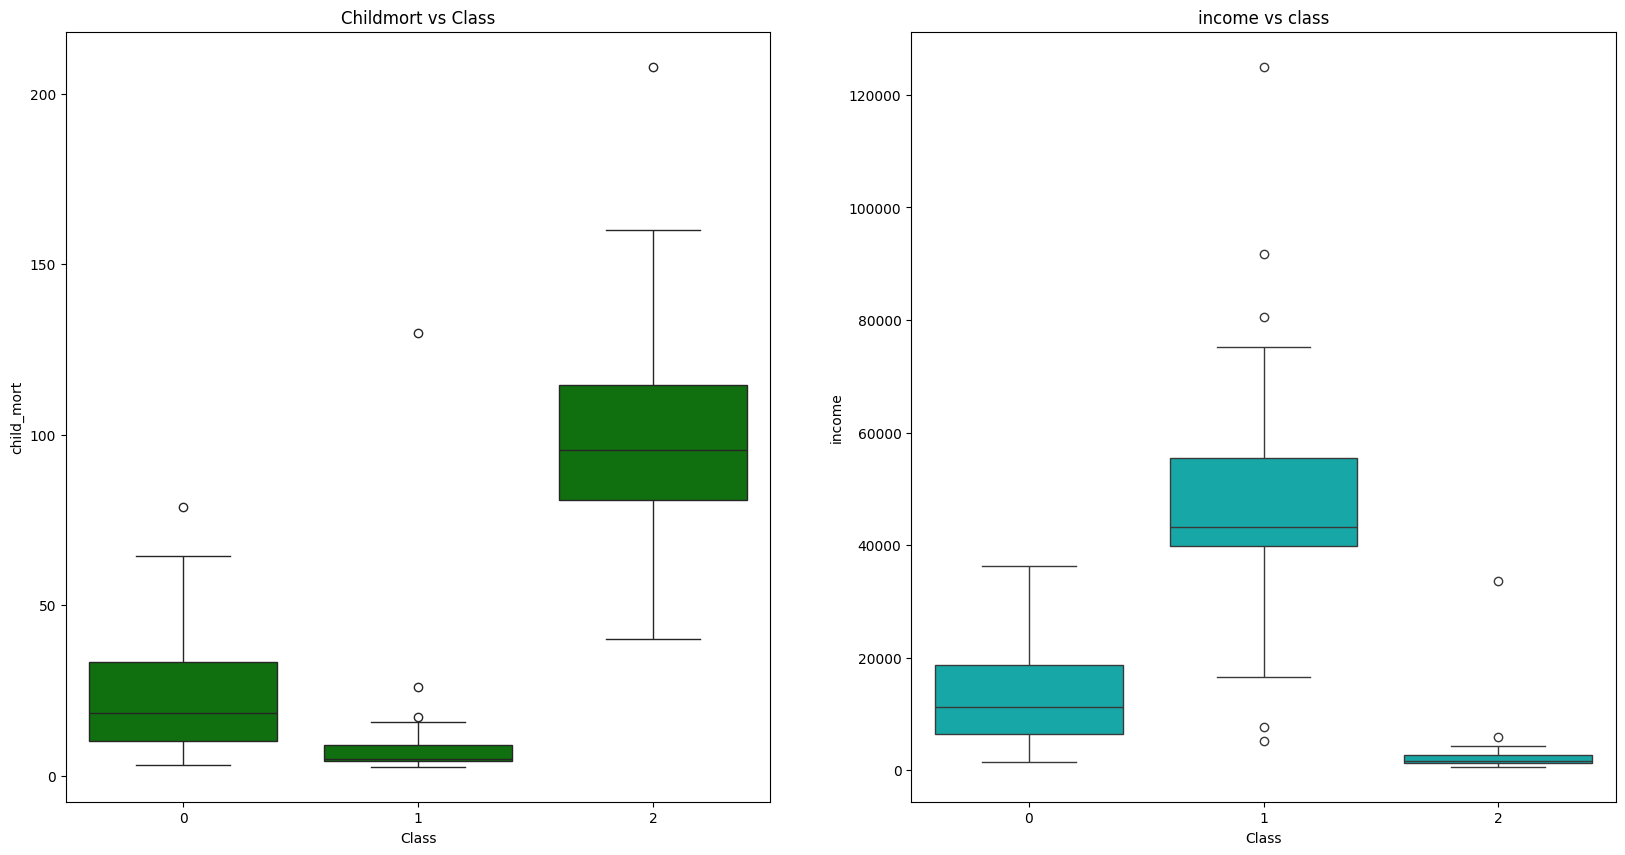

In [61]:
fig , ax = plt.subplots(1,2 , figsize = (20,10))

plt.subplot(1,2,1)
sns.boxplot(x = "Class" , y = "child_mort" , data = df , color = 'g')
plt.title("Childmort vs Class")

plt.subplot(1,2,2)
sns.boxplot(x = 'Class' , y = 'income' , data = df , color = 'c')
plt.title('income vs class')
plt.show()

## Từ biểu đồ trên
-  0 :Có thể cần hộ trợ nếu đủ ngân sách
- 2 :Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao
-  1 :Không cần phải hỗ trợ

In [62]:
df1['Class'].loc[df1['Class'] == 0] = 'Có thể cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==1] = 'Không cần hỗ trợ'
df1['Class'].loc[df1['Class'] ==2] = 'Rất cần hỗ trợ' 

In [63]:
df1['Class'].value_counts()

Class
Có thể cần hỗ trợ    102
Rất cần hỗ trợ        36
Không cần hỗ trợ      29
Name: count, dtype: int64

## Apply Kmeans vs PCA

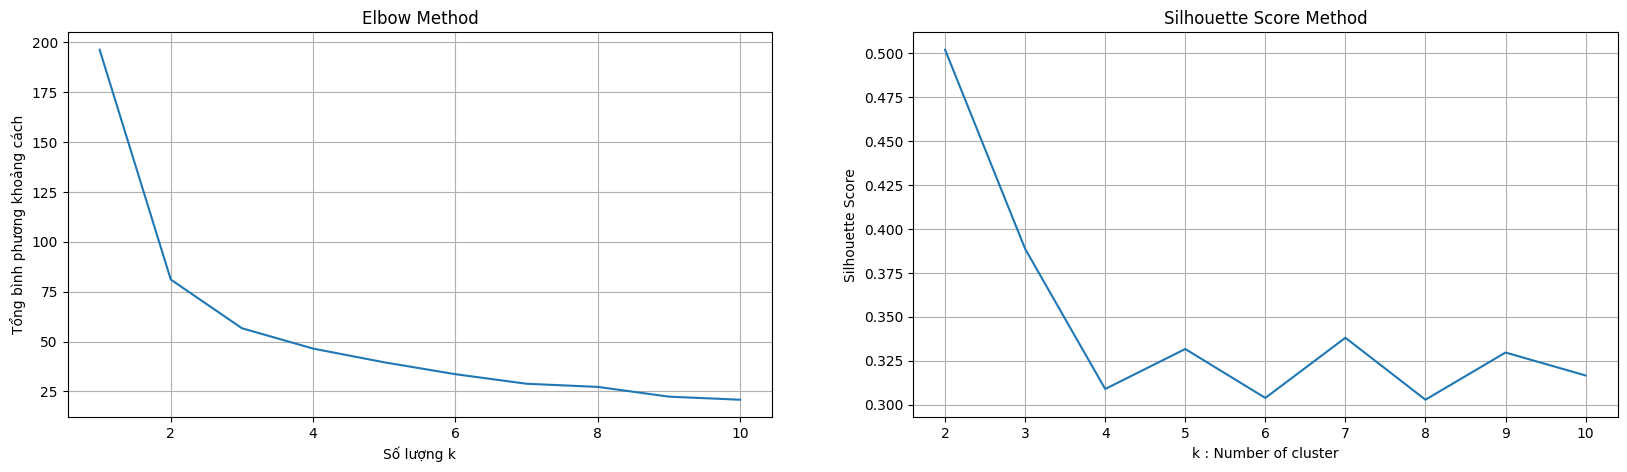

In [66]:
kmax = 10 
sse = [0] * kmax
sil = []
fig= plt.subplots(1,2 , figsize = (20,5))
plt.subplot(1,2,1)
for k in range(1 , kmax+1):
    kmeans = KMeans(n_clusters=k , init = "k-means++" , random_state= 42)
    kmeans.fit(x2)
    sse[k-1] = kmeans.inertia_

sns.lineplot(x = range(1 , kmax+1) , y = sse[:])
plt.title("Elbow Method")
plt.xlabel("Số lượng k")
plt.ylabel("Tổng bình phương khoảng cách")
plt.grid()
plt.subplot(1,2,2)
for k in range(2 , kmax+1):
    kmeans = KMeans(n_clusters=k , init ="k-means++" , random_state= config.RANDOM_STATE)
    kmeans.fit(x2)
    labels = kmeans.labels_
    sil.append(silhouette_score(x2 , labels , metric= "euclidean"))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- Chọn k = 3 là tốt nhất qua biểu đồ trên

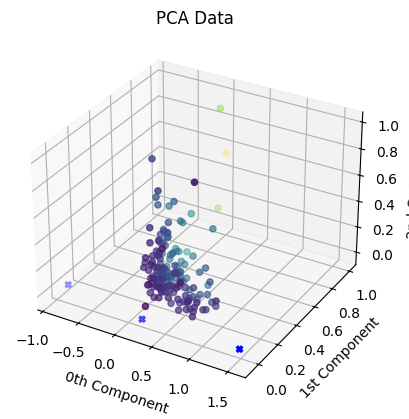

In [71]:
model = KMeans(n_clusters=3 , init = 'k-means++' , random_state= config.RANDOM_STATE)
model.fit(x2) 
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df["Class"] = labels 
pca_df2["Class"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(centroids[: , 0] , centroids[: , 1] , centroids[:,2] , marker = "X" , color ='b')
plt.title("PCA Data")
ax.set_xlabel("0th Component")
ax.set_ylabel("1st Component")
ax.set_zlabel("2nd Component")
ax.scatter(x, y, z, c=y)
plt.show()

Không phân biệt được cụm nào với cụm nào vẽ child_mort và income để gán cụm

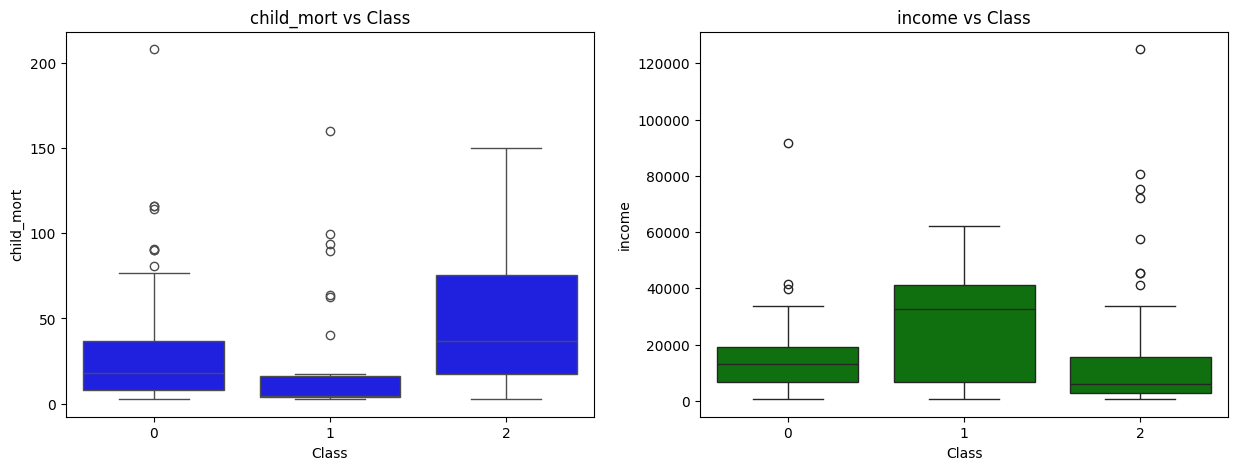

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=df, color="b" )
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=df, color="g" )
plt.title("income vs Class")

plt.show()  

## Từ biểu đồ trên
-  0 :Có thể cần hộ trợ nếu đủ ngân sách
- 2 :Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao
-  1 :Không cần phải hỗ trợ

In [73]:
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Có thể cần hỗ trợ'
pca_df2['Class'].loc[pca_df2['Class'] ==1] = 'Không cần hỗ trợ'
pca_df2['Class'].loc[pca_df2['Class'] ==2] = 'Rất cần hỗ trợ' 

In [74]:

pca_df2['Class'].value_counts()

Class
Rất cần hỗ trợ       72
Có thể cần hỗ trợ    62
Không cần hỗ trợ     33
Name: count, dtype: int64